In [84]:
#Reseta os imports caso precise
reload
import src.data.load_data as ld
reload(ld)

<module 'src.data.load_data' from '/mnt/SegundoHD/Documentos/Projetos/EnergyForecast/src/data/load_data.py'>

In [85]:
# Import para visualizar as pastas
import os
import sys

# Adiciona a pasta raiz do projeto ao path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from pathlib import Path

In [86]:
# import das bibliotecas utilizadas para exploração do dataframe
from src.data.load_data import load_raw_csv, load_custom_csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [87]:
df = load_raw_csv()
display(df)

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [88]:
print(df.shape)

(121273, 2)


In [89]:
print(df.describe())

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000


In [90]:
print(df.isna().sum())

Datetime    0
AEP_MW      0
dtype: int64


In [91]:
print(df.dtypes)

Datetime     object
AEP_MW      float64
dtype: object


## Ttransofrmando Coluna Datetime para Datetime

In [92]:
df_datetime = df.copy()
df_datetime['Datetime'] = pd.to_datetime(df_datetime['Datetime'])

In [93]:
display(df_datetime)

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [94]:
print(df_datetime.dtypes)

Datetime    datetime64[ns]
AEP_MW             float64
dtype: object


In [95]:
df_aep_mw = df['AEP_MW']

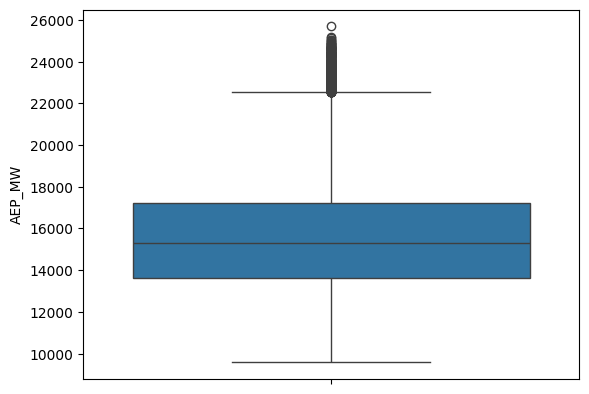

In [96]:
ax = sns.boxplot(data=df_aep_mw)
plt.tight_layout
plt.show()

In [97]:
df_date = df_datetime.sort_values("Datetime")

In [98]:
display(df_date)

,Datetime,AEP_MW
2183,2004-10-01 01:00:00,12379.0
2184,2004-10-01 02:00:00,11935.0
2185,2004-10-01 03:00:00,11692.0
2186,2004-10-01 04:00:00,11597.0
2187,2004-10-01 05:00:00,11681.0
...,...,...
116157,2018-08-02 20:00:00,17673.0
116158,2018-08-02 21:00:00,17303.0
116159,2018-08-02 22:00:00,17001.0
116160,2018-08-02 23:00:00,15964.0


# Salvando Novo DF

Salvando novo dataframe no caminha `data/processed`

In [99]:
# Salvar o DataFrame completo ajustado
data_path = Path("../data/processed")  # ".." sobe um nível para o root do projeto
# Garantir que a pasta processed exista
os.makedirs(data_path, exist_ok=True)
df_date.to_csv(data_path/"AEP_hourly_update.csv", index=False)

## Gerando arquivos csv e png 2004 a 2018

- Arquivos .csv gerados em `data/processed`
- Arquivos .png gerados em `reports/figures`

In [ ]:
# Adiciona a pasta raiz do projeto ao path
from src.utils.plot_utils import plot_eda

# Gernado aqurivos CSV e png do ano de 2004
start_date = '2004-10-01 01:00:00'
end_date = '2004-12-31 23:00:00'
df_age = df_date[(df_date['Datetime'] >= start_date) & (df_date['Datetime'] 
                    <= end_date)].copy()

plot_eda(df_age, 2004)

# Loop gerando arquivos CSV e png dos anos de 2005 a 2009
for i in range(5,18):
    year = 2000 + i
    start_date = f'{year}-01-01 00:00:00'
    end_date = f'{year}-12-31 23:00:00'
    df_age = df_date[(df_date['Datetime'] >= start_date) & (df_date['Datetime'] <= end_date)].copy()

    plot_eda(df_age, year=year)

# Gernado aqurivos CSV e png do ano de 2018
start_date = '2018-01-01 00:00:00'
end_date = '2018-08-03 00:00:00'
df_age = df_date[(df_date['Datetime'] >= start_date) & (df_date['Datetime'] 
                    <= end_date)].copy()

plot_eda(df_age, 2018)

# Gerando os df dos arquviso .csv de 2004 a 2018

In [106]:
df_2004 = load_custom_csv("AEP_2004.csv")
df_2017 = load_custom_csv("AEP_2017.csv")
df_2018 = load_custom_csv("AEP_2018.csv")

In [107]:
#display(df_2004)
print(f'2004 - {df_2004.shape}')
print(f'2017 - {df_2017.shape}')
print(f'2018 - {df_2018.shape}')

2004 - (2206, 2)
2017 - (8760, 2)
2018 - (5136, 2)
